<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/Regrecion_polinomial_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
i
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# storing and anaysis
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import folium
from sklearn.preprocessing import PolynomialFeatures
# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [ ]:
df=pd.read_csv('/content/covid_19_clean_complete.csv')
df['Date']=pd.to_datetime(df['Date'])
df.head(10)
Turkey_df=df[df['Country/Region']=='Turkey']

In [ ]:
fig = px.choropleth(df, locations="Country/Region", locationmode='country names', color=np.log(df["Confirmed"]),
                    hover_name="Country/Region", animation_frame=df["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.Magenta)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
# confirmed - deaths
fig_c = px.bar(country_wise.sort_values('Confirmed').tail(15), x="Confirmed", y="Country/Region",
               text='Confirmed', orientation='h', color_discrete_sequence = ['#a3de83'])
fig_d = px.bar(country_wise.sort_values('Deaths').tail(15), x="Deaths", y="Country/Region",
               text='Deaths', orientation='h', color_discrete_sequence = ['#f38181'])





# plot
fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.14, vertical_spacing=0.08,
                    subplot_titles=('Confirmed cases', 'Deaths reported'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)

fig.update_layout(height=500)

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1571387"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

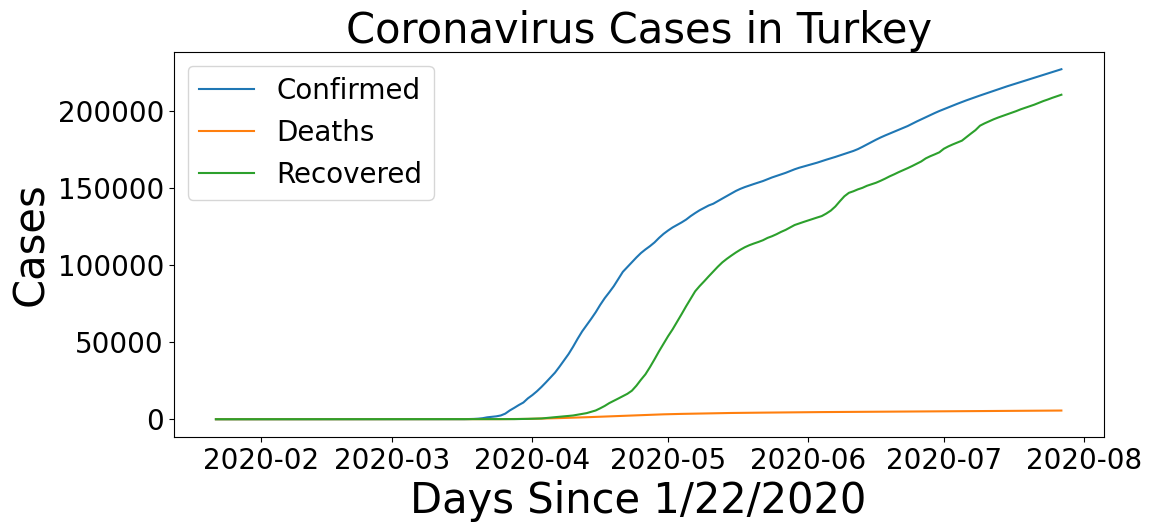

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(Turkey_df['Date'], Turkey_df['Confirmed'])
plt.plot(Turkey_df['Date'], Turkey_df['Deaths'])
plt.plot(Turkey_df['Date'], Turkey_df['Recovered'])
plt.title('Coronavirus Cases in Turkey', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Cases', size=30)
plt.legend(['Confirmed', 'Deaths', 'Recovered'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
dff=pd.read_csv('/content/country_wise_latest.csv')
dff.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

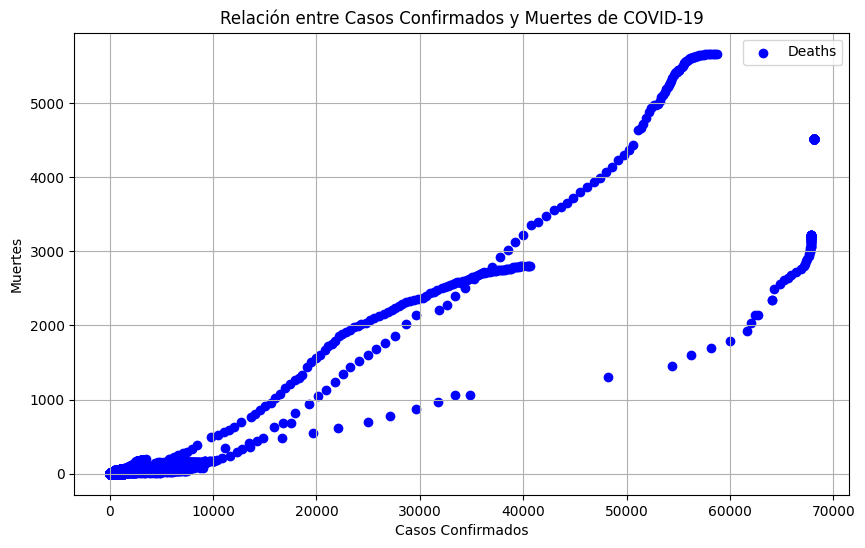

In [ ]:
# Visualización básica de los datos (por ejemplo, Confirmed vs Deaths)
plt.figure(figsize=(10, 6))
plt.scatter(df['Confirmed'], df['Deaths'], color='blue', label='Deaths')
plt.title('Relación entre Casos Confirmados y Muertes de COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('Muertes')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Paso 2: Ajuste del Modelo de Regresión Polinomial

# Preparar los datos para la regresión polinomial
X = df['Confirmed'].values.reshape(-1, 1)  # Casos confirmados como variable independiente
y = df['Deaths'].values.reshape(-1, 1)  # Muertes como variable dependiente


In [ ]:
# Crear características polinomiales de grado 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [ ]:
# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos transformados
model.fit(X_poly, y)

LinearRegression()

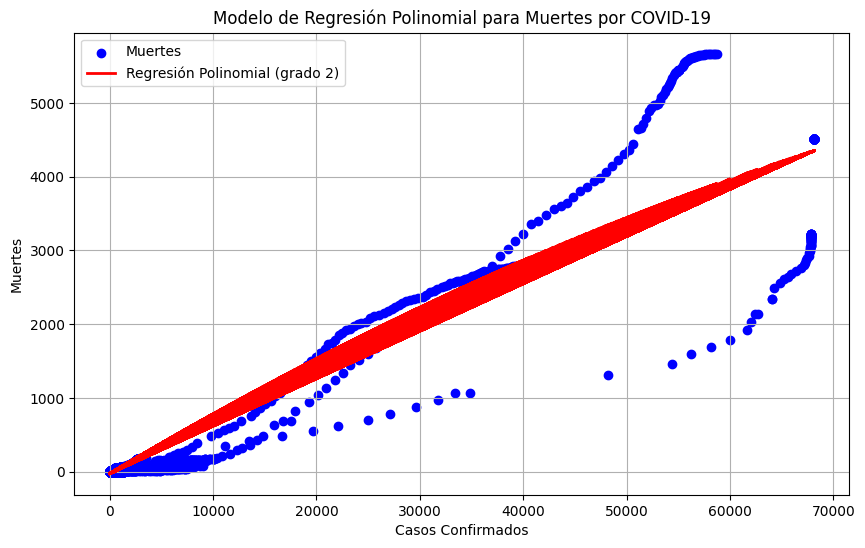

In [ ]:
# Visualizar el ajuste del modelo polinomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Muertes')
plt.plot(X, model.predict(X_poly), color='red', linewidth=2, label='Regresión Polinomial (grado 2)')
plt.title('Modelo de Regresión Polinomial para Muertes por COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('Muertes')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Imprimir los coeficientes del modelo polinomial
print(f'Coeficientes del modelo polinomial (grado 2): {model.coef_}')
print(f'Término independiente del modelo polinomial (grado 2): {model.intercept_}')

Coeficientes del modelo polinomial (grado 2): [[ 0.00000000e+00  8.38480397e-02 -2.86971627e-07]]
Término independiente del modelo polinomial (grado 2): [-26.82695151]


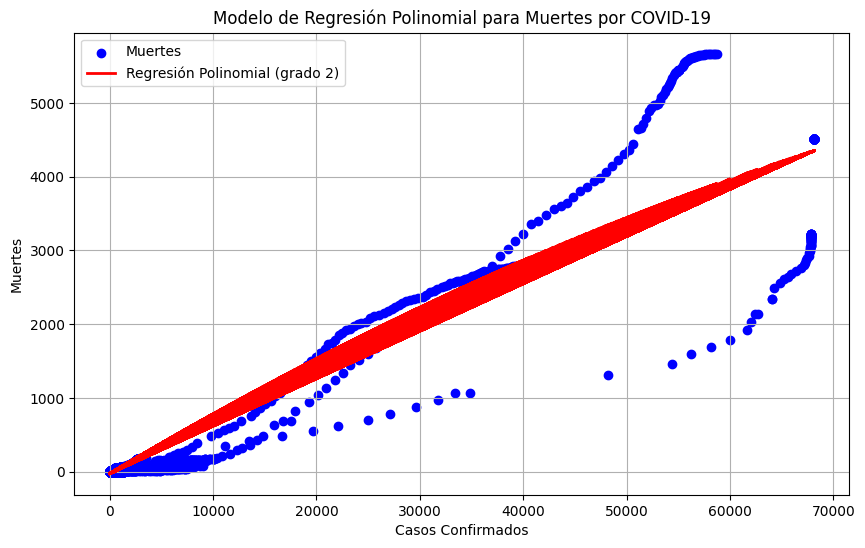

Coeficientes del modelo polinomial (grado 2): [[ 0.00000000e+00  8.38480397e-02 -2.86971627e-07]]
Término independiente del modelo polinomial (grado 2): [-26.82695151]


In [ ]:
# Paso 3: Evaluación del Modelo y Resultados

# Visualizar el ajuste del modelo polinomial junto con los datos originales
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Muertes')
plt.plot(X, model.predict(X_poly), color='red', linewidth=2, label='Regresión Polinomial (grado 2)')
plt.title('Modelo de Regresión Polinomial para Muertes por COVID-19')
plt.xlabel('Casos Confirmados')
plt.ylabel('Muertes')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los coeficientes del modelo polinomial
print(f'Coeficientes del modelo polinomial (grado 2): {model.coef_}')
print(f'Término independiente del modelo polinomial (grado 2): {model.intercept_}')
